In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from itertools import product  


In [3]:
#[x,y,z]
#Mental note: Be overt with variables and function
#could expand Varriables, for Nu(150MHz) of interest and STR(100)

def measurement_eq(freq,antenna1,antenna2,source):
    t= antenna1 - antenna2   
    x = 100.0*(150.0e6/freq)**(1)*np.exp(-2j*np.pi*np.dot(t,source)*freq/(3e8))
    return x


In [4]:
#used to simplify original thing
#Could expand Vars: NuInterst(100MHz), Location_ant1[x,y,z](0,0,0), Location_ant2[x,y,x](10,0,0)

def Signal(angle,delta):
    x=0
    x=measurement_eq(100e6,np.array([0,0,0]),np.array([10,0,0]),
                                   [np.cos((angle-delta*16)/2880.0*np.pi),0,np.sin((angle-delta*16)/2880*np.pi)])
    return x



0.25

/home/champ2/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 180)

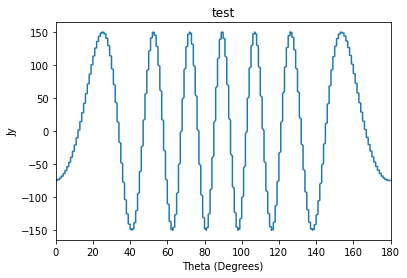

In [5]:
#Trail 1&2; method 1.
#Was expanded to include two sources but removed to see if I could find another simplified way.

emp1=[]
horz=[]
emp2=[]

for i in range(2881):
    horz.append(i/16)
    emp1.append(measurement_eq(100e6,np.array([0,0,0]),np.array([10,0,0]),
                              [np.cos((i)/2880.0*np.pi),0,np.sin((i)/2880.0*np.pi)]))

    #after i in "Cos((i.. enter "- 480" to regain orginal system and remove "#" from next 2 lines

    #emp2.append(measurement_eq(100e6,np.array([0,0,0]),np.array([10,0,0]),
                               #[np.cos((i+480)/2880.0*np.pi),0,np.sin((i+480)/2880*np.pi)]))   
plt.figure(1)
plt.title('test')
plt.xlabel('Theta (Degrees)')
plt.ylabel('Jy')
plt.plot(horz,emp1)

plt.xlim(0,180)


(0, 180)

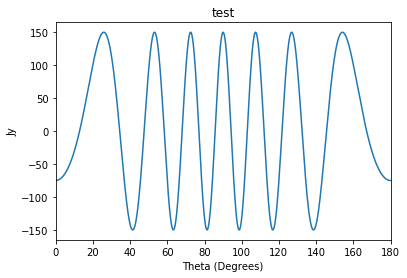

In [6]:
#Trail 1; method 2.1
emp1=[]
horz=[]
for i in range(2881):
    horz.append(i/16.0)
    emp1.append(Signal(i,0))
   
#


plt.figure(2)
plt.title('test')
plt.xlabel('Theta (Degrees)')
plt.ylabel('Jy')
plt.plot(horz,emp1)
plt.xlim(0,180)
#method 1.1 16-> 16.0 in "horz.append(i/16.0

(0, 180)

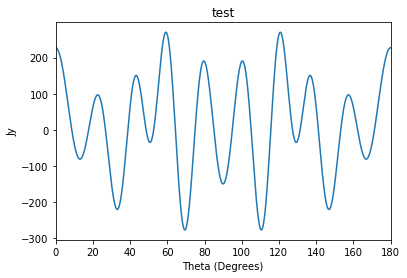

In [11]:
#Trail 2; method 2.2
emp1=[]
horz2=[]
horz2 = np.arange(0.0,180.0+1/16.0,1/16.0)
emp2=[]
for i in range(2881):
    #horz.append(i/16.0)
    emp1.append(Signal(i,-30.0))
    emp2.append(Signal(i,30.00))
    
plt.figure(3)
plt.title('test')
plt.xlabel('Theta (Degrees)')
plt.ylabel('Jy')
plt.plot(horz2,np.array(emp1)+np.array(emp2))
plt.xlim(0,180)

#2.0 used Signal function
#method 2.1 16-> 16.0 in "horz.append(i/16.0)"
#method 2.2 removed horz out of Forloop and used np.arange()


In [12]:
#From Ridhima and Josh, Going to figure this out to use this for 100 Signal sources... ,np.zero,np.arange


In [15]:
#Example
#result = np.zeros((100, 1441))for i in range(100): result[i,:] = range(0,1441)print resultmeasurement_eq(100e6,np.array([0,0,0]),np.array([10,0,0]),[np.cos((i-240)/1440.0*np.pi),0,np.sin((i-240)/1440*np.pi)])

#12*8+4


96

In [39]:
#Test/simple calculations
#Test 1
"""
result = np.zeros(2881)
for i in range(2881):
    result[i] = i/16.0
print result
"""
#Test 2 np. and shifted
#r= np.arange(-90.0+.9,90.0, 1.8)
#temp = np.zeros(2881)
#Test 3
#for j in range (100):
#    for i in range(2881):
#       temp[i] = Signal(i,r[j])   
#Test 4 (success)
#lst  = np.arange(0,180.0+1/16.0,1/16.0)
#Test 5 (??? it is what I would have expected but doesn't relate to "brute force method")
temp_sig = np.zeros(2881)
tot_sig = np.zeros(2881)

ra   = np.arange(-90.0+.9,90.0, 1.8)
lst  = np.arange(0,180.0+1/16.0,1/16.0)

print(lst)
print(ra)
"""
for j in range (100):
    for i in range(2881):
        temp_sig[i] = Signal(i,r[j])
                
    #print(temp_sig)
    #print(np.add(tot_sig, temp_sig))
    tot_sig=np.add(tot_sig, temp_sig)
"""

[  0.00000000e+00   6.25000000e-02   1.25000000e-01 ...,   1.79875000e+02
   1.79937500e+02   1.80000000e+02]
[-89.1 -87.3 -85.5 -83.7 -81.9 -80.1 -78.3 -76.5 -74.7 -72.9 -71.1 -69.3
 -67.5 -65.7 -63.9 -62.1 -60.3 -58.5 -56.7 -54.9 -53.1 -51.3 -49.5 -47.7
 -45.9 -44.1 -42.3 -40.5 -38.7 -36.9 -35.1 -33.3 -31.5 -29.7 -27.9 -26.1
 -24.3 -22.5 -20.7 -18.9 -17.1 -15.3 -13.5 -11.7  -9.9  -8.1  -6.3  -4.5
  -2.7  -0.9   0.9   2.7   4.5   6.3   8.1   9.9  11.7  13.5  15.3  17.1
  18.9  20.7  22.5  24.3  26.1  27.9  29.7  31.5  33.3  35.1  36.9  38.7
  40.5  42.3  44.1  45.9  47.7  49.5  51.3  53.1  54.9  56.7  58.5  60.3
  62.1  63.9  65.7  67.5  69.3  71.1  72.9  74.7  76.5  78.3  80.1  81.9
  83.7  85.5  87.3  89.1]


'\nfor j in range (100):\n    for i in range(2881):\n        temp_sig[i] = Signal(i,r[j])\n                \n    #print(temp_sig)\n    #print(np.add(tot_sig, temp_sig))\n    tot_sig=np.add(tot_sig, temp_sig)\n'

In [27]:
#Trial 3 method 1.1 (Brute force it)
Multiple_Sources=[]
Place_holder1=[]
Place_holder2=[]
horz3=[]

tzarbomba=0
nuke=0
for i in range(1441):
    horz3.append(i/8.0)
for q in range(50):
    nuke = tzarbomba
    for i in range(1441):
        Place_holder1.append(measurement_eq(100e6,np.array([0,0,0]),np.array([10,0,0]),
                                            [np.cos((i-14.4*q)/1440.0*np.pi),0,np.sin((i-14.4*q)/1440*np.pi)]))
        Place_holder2.append(measurement_eq(100e6,np.array([0,0,0]),np.array([10,0,0]),
                                            [np.cos((i+14.4*q)/1440.0*np.pi),0,np.sin((i+14.4*q)/1440*np.pi)]))
        tzarbomba+=1
    Multiple_Sources.append(Place_holder1[nuke:tzarbomba])
    Multiple_Sources.append(Place_holder2[nuke:tzarbomba])

(0, 180)

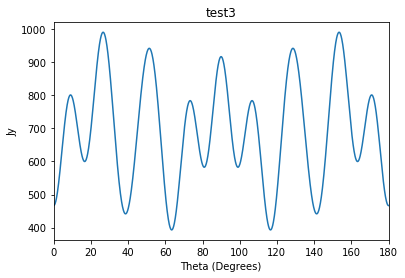

In [28]:
#Trial 3 method 1 (Brute force it)
plt.figure(2)
plt.title('test3')
plt.xlabel('Theta (Degrees)')
plt.ylabel('Jy')
plt.plot(horz3,
          np.array(Multiple_Sources[0 ])+np.array(Multiple_Sources[1 ])+np.array(Multiple_Sources[2 ])
         +np.array(Multiple_Sources[3 ])+np.array(Multiple_Sources[4 ])+np.array(Multiple_Sources[5 ])
         +np.array(Multiple_Sources[6 ])+np.array(Multiple_Sources[7 ])+np.array(Multiple_Sources[8 ])
         +np.array(Multiple_Sources[9 ])+np.array(Multiple_Sources[10])+np.array(Multiple_Sources[11])
         +np.array(Multiple_Sources[12])+np.array(Multiple_Sources[13])+np.array(Multiple_Sources[14])
         +np.array(Multiple_Sources[15])+np.array(Multiple_Sources[16])+np.array(Multiple_Sources[17])
         +np.array(Multiple_Sources[18])+np.array(Multiple_Sources[19])+np.array(Multiple_Sources[20])
         +np.array(Multiple_Sources[21])+np.array(Multiple_Sources[22])+np.array(Multiple_Sources[23])
         +np.array(Multiple_Sources[24])+np.array(Multiple_Sources[25])+np.array(Multiple_Sources[26])
         +np.array(Multiple_Sources[27])+np.array(Multiple_Sources[28])+np.array(Multiple_Sources[29])
         +np.array(Multiple_Sources[30])+np.array(Multiple_Sources[31])+np.array(Multiple_Sources[32])
         +np.array(Multiple_Sources[33])+np.array(Multiple_Sources[34])+np.array(Multiple_Sources[35])
         +np.array(Multiple_Sources[36])+np.array(Multiple_Sources[37])+np.array(Multiple_Sources[38])
         +np.array(Multiple_Sources[39])+np.array(Multiple_Sources[40])+np.array(Multiple_Sources[41])
         +np.array(Multiple_Sources[42])+np.array(Multiple_Sources[43])+np.array(Multiple_Sources[44])
         +np.array(Multiple_Sources[45])+np.array(Multiple_Sources[46])+np.array(Multiple_Sources[47])
         +np.array(Multiple_Sources[48])+np.array(Multiple_Sources[49])+np.array(Multiple_Sources[50])
         +np.array(Multiple_Sources[51])+np.array(Multiple_Sources[52])+np.array(Multiple_Sources[53])
         +np.array(Multiple_Sources[54])+np.array(Multiple_Sources[55])+np.array(Multiple_Sources[56])
         +np.array(Multiple_Sources[57])+np.array(Multiple_Sources[58])+np.array(Multiple_Sources[59])
         +np.array(Multiple_Sources[60])+np.array(Multiple_Sources[61])+np.array(Multiple_Sources[62])
         +np.array(Multiple_Sources[63])+np.array(Multiple_Sources[64])+np.array(Multiple_Sources[65])
         +np.array(Multiple_Sources[66])+np.array(Multiple_Sources[67])+np.array(Multiple_Sources[68])
         +np.array(Multiple_Sources[69])+np.array(Multiple_Sources[70])+np.array(Multiple_Sources[71])
         +np.array(Multiple_Sources[72])+np.array(Multiple_Sources[73])+np.array(Multiple_Sources[74])
         +np.array(Multiple_Sources[75])+np.array(Multiple_Sources[76])+np.array(Multiple_Sources[77])
         +np.array(Multiple_Sources[78])+np.array(Multiple_Sources[79])+np.array(Multiple_Sources[80])
         +np.array(Multiple_Sources[81])+np.array(Multiple_Sources[82])+np.array(Multiple_Sources[83])
         +np.array(Multiple_Sources[84])+np.array(Multiple_Sources[85])+np.array(Multiple_Sources[86])
         +np.array(Multiple_Sources[87])+np.array(Multiple_Sources[88])+np.array(Multiple_Sources[89])
         +np.array(Multiple_Sources[90])+np.array(Multiple_Sources[91])+np.array(Multiple_Sources[92])
         +np.array(Multiple_Sources[93])+np.array(Multiple_Sources[94])+np.array(Multiple_Sources[95])
         +np.array(Multiple_Sources[96])+np.array(Multiple_Sources[97])+np.array(Multiple_Sources[98])
         +np.array(Multiple_Sources[99]))

#plt.plot(horz,emp2)
#plt.axis([0,180,149.98,150.02])
plt.xlim(0,180)

/home/champ4/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: ComplexWarning: Casting complex values to real discards the imaginary part


(0, 180)

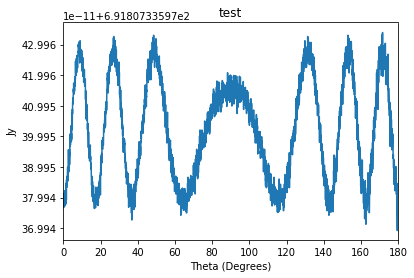

In [38]:
#Trial 3 method 2.4

temp_sig = np.zeros(2881)
tot_sig = np.zeros(2881)

ra   = np.arange(-90.0+.9,90.0, 1.8)
lst  = np.arange(0,180.0+1/16.0,1/16.0)


for j in range (100):
    for i in range(2881):
        temp_sig[i] = Signal(i,r[j])
    tot_sig=np.add(tot_sig, temp_sig)
    
    
    
plt.figure(1)
plt.title('test')
plt.xlabel('Theta (Degrees)')
plt.ylabel('Jy')
plt.plot(lst,tot_sig)
plt.xlim(0,180)



In [ ]:
#attempt to create a class solution

    